## 1    Logistic Regression

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

### 1.1 Visualizing the Data

Text(0, 0.5, 'Exam2 score')

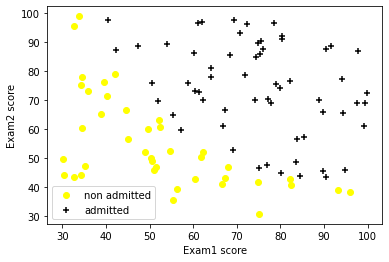

In [95]:
data1 = np.loadtxt('ex2data1.txt', dtype=float, delimiter=',')
not_admitted = np.where(data1[: , 2] == 0)
admitted = np.where(data1[:, 2] == 1)
plt.scatter(data1[not_admitted, 0], data1[not_admitted, 1], c='yellow', marker="o", label='non admitted')
plt.scatter(data1[admitted, 0], data1[admitted, 1], c='black', marker="+", label='admitted')
plt.legend(loc=0)
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')

### 1.2 Implementation
#### 1.2.1 sigmoid function

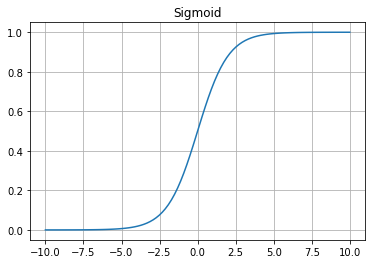

In [98]:
def sigmoid(z):
    """Sigmoid function
    """
    return 1 / (1 + np.exp(-z))
z2plot = np.linspace(-10, 10, 100)
plt.plot(z2plot, sigmoid(z2plot))
plt.title("Sigmoid")
plt.grid()

#### 1.2.2 Cost function and gradient

In [99]:
def costFunction(theta, X, y):
    theta = theta.reshape(-1, 1)
    n_samples = X.shape[0]
    d = X.shape[1]
    X_train = np.c_[np.ones((n_samples, 1)), X]
    #print(f"X_train.shape={X_train.shape}")
    J = np.sum(y * np.log(sigmoid(X_train @ theta)) + (1 - y) * np.log(1 - sigmoid(X_train @ theta))) * (-1 / n_samples)
    grad = np.mean((sigmoid(X_train @ theta) - y) * X_train, axis=0)
    return J, grad.squeeze()

#### 1.2.3 Learning parameters

In [100]:
def trainModel(X, y):
    n_samples, d = X.shape
    theta0 = np.zeros(d+1)
    result = minimize(costFunction, x0=theta0, args=(X, y), jac=True, method="BFGS")
    if result.success:
        theta = result.x
    return theta

In [101]:
X = data1[:, :2]
y = data1[:, 2]
y = y[:, np.newaxis]
theta = trainModel(X, y)

C:\Users\zchen\.conda\envs\dl\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\zchen\.conda\envs\dl\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


#### 1.2.4 Evaluating logistic regression

Text(0, 0.5, 'Exam2 score')

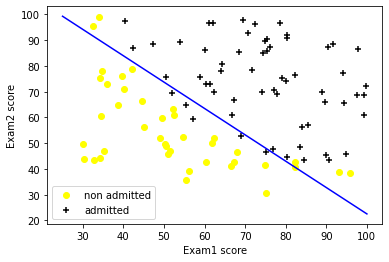

In [102]:
data1 = np.loadtxt('ex2data1.txt', dtype=float, delimiter=',')
not_admitted = np.where(data1[: , 2] == 0)
admitted = np.where(data1[:, 2] == 1)
plt.scatter(data1[not_admitted, 0], data1[not_admitted, 1], c='yellow', marker="o", label='non admitted')
plt.scatter(data1[admitted, 0], data1[admitted, 1], c='black', marker="+", label='admitted')
plt.legend(loc=0)
a = np.linspace(25, 100, 100)
plt.plot(a, -(theta[0] + theta[1] * a) / theta[2], label='Decision Boubdary', c='b')
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')

## 2 Regularized Logistic Regression 

### 2.1: Visualizing the Data

Text(0, 0.5, 'Test 2')

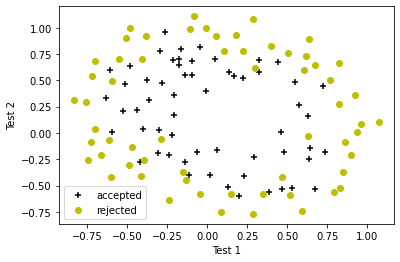

In [103]:
data2 = np.loadtxt('ex2data2.txt', delimiter=',')
accepted = np.where(data2[:, 2] == 1)
rejected = np.where(data2[:, 2] == 0)
plt.scatter(data2[accepted, 0], data2[accepted, 1], c='black', marker='+', label='accepted')
plt.scatter(data2[rejected, 0], data2[rejected, 1], c='y', marker='o', label='rejected')
plt.legend(loc='best')
plt.xlabel('Test 1')
plt.ylabel('Test 2')

### 2.2 Feature mapping

In [156]:
from itertools import product
def mapFeature(X, p=6):
    X_map = None
    x1 = X[:, 0:1]
    x2 = X[:, 1:2]
    for s in np.arange(p+1):
        for i in np.arange(s+1):
            j = s - i
            Xij = np.power(x1, i) * np.power(x2, j)
            if X_map is None:
                X_map = Xij
            else:
                X_map = np.c_[X_map, Xij]
    return X_map

In [157]:
X = data2[:, 0:2]
X_map = mapFeature(X)
print(f"Shape of X_map is {X_map.shape}")
y = data2[:, 2]
y = y[:, np.newaxis]

Shape of X_map is (118, 28)


### 2.3 Cost function and gradient

In [158]:
def costFunctionReg(theta, X, y, lamda):
    theta = theta.reshape(-1, 1)
    n_samples = X.shape[0]
    d = X.shape[1]
    assert len(theta) == d
    # X_train = np.c_[np.ones((n_samples, 1)), X]
    reg = lamda * np.sum(np.square(theta[1:])) / (2 * n_samples)
    J = np.sum(y * np.log(sigmoid(X @ theta)) + (1 - y) * np.log(1 - sigmoid(X @ theta))) * (-1 / n_samples) + reg
    
    tmp = lamda * theta / n_samples
    tmp[0] = 0
    grad = np.mean((sigmoid(X @ theta) - y) * X, axis=0) + tmp.squeeze()
    return J, grad

In [159]:
theta=np.zeros(28)
J, grad = costFunctionReg(theta, X_map, y, 0)
J

0.6931471805599454

#### 2.3.1  Learning parameters

In [160]:
def trainModelReg(X, y, lamda):
    n_samples, d = X.shape
    theta0 = np.zeros(d)
    result = minimize(costFunctionReg, x0=theta0, args=(X, y, lamda), jac=True, method="BFGS")
    if result.success:
        theta = result.x
    return theta

In [161]:
theta = trainModelReg(X_map, y, lamda=1)

In [171]:
def plotDecisionBD(theta):
    plt.figure()
    accepted = np.where(data2[:, 2] == 1)
    rejected = np.where(data2[:, 2] == 0)
    plt.scatter(data2[accepted, 0], data2[accepted, 1], c='black', marker='+', label='accepted')
    plt.scatter(data2[rejected, 0], data2[rejected, 1], c='y', marker='o', label='rejected')
    plt.legend(loc='best')
    plt.xlabel('Test 1')
    plt.ylabel('Test 2')
    x = np.linspace(-1, 1.5, 100)
    y = np.linspace(-0.8, 1.2, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((len(y), len(x)))
    for i in range(len(x)):
        for j in range(len(y)):
            X2 = np.zeros((1, 2))
            X2[0, 0] = x[j]
            X2[0, 1] = y[i]
            Z[i, j] = mapFeature(X2) @ theta[:, np.newaxis]
    plt.contour(X, Y, Z, levels=[0], colors=['green'])
    plt.show()

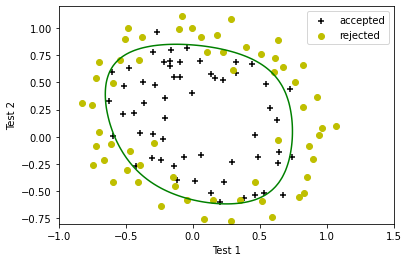

In [172]:
plotDecisionBD(theta)

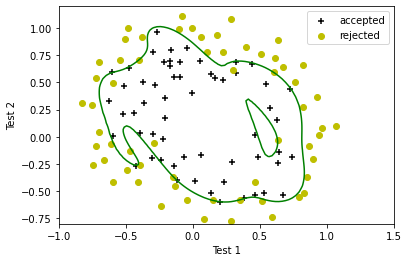

In [173]:
theta = trainModelReg(X_map, y, lamda=0)
plotDecisionBD(theta)

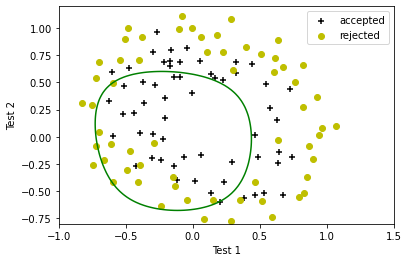

In [174]:
theta = trainModelReg(X_map, y, lamda=100)
plotDecisionBD(theta)